In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, confusion_matrix, auc
from sklearn import linear_model
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [112]:
folders = glob.glob("../data/00_gaze_data/sub*")
folders.sort()
subjs = []
for f in folders:
    subjs.append(f[-6:])
print(len(subjs))    
subjs[:3]

condition_index = ['count trash']*20 + ['free viewing']*20
condition_index[:3]

40


['count trash', 'count trash', 'count trash']

In [113]:
list_of_dataframes = []

for i in range(len(subjs)): #use the first 20 subjs 1-20 -- condition1
    read_file_name = '../data/fixation_billboards_recall_recognition/'  + subjs[i] +'_fixations_billboards_recall_recognition.csv'
    df = pd.read_csv(read_file_name, index_col = 0)
    df['subject'] = subjs[i]
    df["condition"] = condition_index[i]
    list_of_dataframes.append(df)
    
large_df = pd.concat(list_of_dataframes)

#add in the binary fix feature
large_df['fix_binarized'] = large_df['fix_bill']
large_df.loc[large_df['fix_binarized'] > 1, 'fix_binarized'] = 1

# factorize
#large_df['billboard_image_at_position_text'] = large_df['billboard_image_at_position_text'].factorize()[0]
#large_df['condition'] = large_df['condition'].factorize()[0]

print( 1- (large_df["recall"].sum()/len(large_df)))


large_df['recall'] = large_df['recall'].replace(0,'norecall')
large_df['recall'] = large_df['recall'].replace(1,'recall')


#large_df["recall"] = large_df[large_df["recall"] ==0]

target = large_df["recall"]


data = large_df.drop(['recall', 'recognition', 'subject'], axis=1)
data.head()

from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)
categorical_columns

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
categorical_encoded_data = encoder.fit_transform(data[categorical_columns])
#plt.imshow(categorical_encoded_data[:40,:])
data_cat = pd.DataFrame(categorical_encoded_data)
data_cat.head()

data = data.drop(['billboard_image_at_position_text', 'condition','fix_binarized'], axis=1)



0.765


In [114]:
data.head()

,position_index,fix_bill
0,1,2.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0


In [115]:
data.head()

,position_index,fix_bill
0,1,2.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0


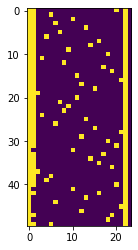

In [116]:
data_joined = np.hstack((data.values, data_cat.values))
data = data_joined
plt.imshow(data[:50,:], vmin = 0, vmax = 1)


In [51]:
target

0     norecall
1     norecall
2     norecall
3     norecall
4     norecall
        ...   
15    norecall
16    norecall
17    norecall
18    norecall
19    norecall
Name: recall, Length: 800, dtype: object

The mean cross-validation accuracy is: 0.500 ± 0.000


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


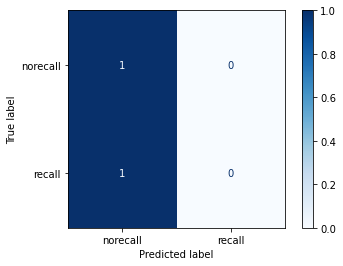

In [117]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score


clf_dummy = DummyClassifier(random_state=42) 
#establishing random_state for reproducibility
clf_dummy.fit(data, target)
y_pred = clf_dummy.predict(data)
plot_confusion_matrix(estimator=clf_dummy, X=data, y_true=target,
                      normalize='true', cmap='Blues')

cv_results = cross_validate(clf_dummy, data, target, cv=5, scoring="roc_auc")
scores = cv_results["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} ± {scores.std():.3f}")

The mean cross-validation accuracy is: 0.728 ± 0.044


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


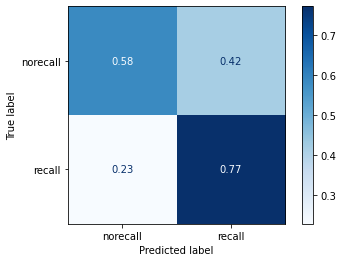

In [118]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_validate

clf_3 = SVC(kernel='linear', 
            class_weight='balanced', # penalize
            probability=True)


cv_results = cross_validate(clf_3, data, target, cv=5, scoring="roc_auc")
scores = cv_results["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} ± {scores.std():.3f}")



clf_3.fit(data, target)

plot_confusion_matrix(estimator=clf_3, X=data, y_true=target,
                      normalize='true', cmap='Blues')

In [9]:
0.680 - 0.132

0.548

In [54]:
plt.plot(data['billboard_image_at_position_text'].values)

KeyError: 'billboard_image_at_position_text'